In [2]:
# Import Dependecy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load the datas
datas = pd.read_csv("../astrCsv.csv")
# print("Data Shape:", datas.shape)
# print("Columns:", datas.columns)
# print("Datas Types:\n", datas.dtypes)
# print("Missing Values:\n", datas.isnull().sum())

C:\Users\techn\AppData\Local\Temp\ipykernel_8028\3682570363.py:2: DtypeWarning: Columns (35,50,60,66,81,85,87,89,91,96,109,111,113,115,117,118,119,121,123,133,139,149,155,161,166,171,176,177,182,187,192,197,202,207,212,213,215,221,231,235,239,243,247,251,255,259,263,267,271,275,279,283,287,291,295,299,303,307,311) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv("../astrCsv.csv")


In [4]:
len(datas.columns)

319

In [5]:
# missing_threshold = 0.4
# missing_fraction = datas.isnull().sum() / len(datas)
# columns_to_drop = missing_fraction[missing_fraction > missing_threshold].index
# data_cleaned = datas.drop(columns=columns_to_drop)

# numerical_columns = data_cleaned.select_dtypes(include=[np.number, np.float32, np.float64]).columns
# for col in numerical_columns:
#     data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
# for col in categorical_columns:
#     data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# print("Remaining Missing Values:\n", data_cleaned.isnull().sum())

In [6]:
import numpy as np
import pandas as pd

# Convert 'rastr' (Right Ascension in time format) to degrees
def rastr_to_degrees(rastr):
    if isinstance(rastr, str):  # Ensure we only process string entries
        # Extract hours, minutes, and seconds from the string
        time_parts = rastr.split('h')
        hours = float(time_parts[0])
        minutes, seconds = time_parts[1].split('m')
        minutes = float(minutes)
        seconds = float(seconds.replace('s', ''))

        # Convert to decimal degrees (1 hour = 15 degrees)
        return 15 * (hours + minutes / 60 + seconds / 3600)
    else:
        return np.nan  # Return NaN for non-string values

# Apply conversion to 'rastr' and create a new 'ra_deg' column
if 'rastr' in datas.columns:
    datas['ra_deg'] = datas['rastr'].apply(rastr_to_degrees)

# Set the threshold for missing values
missing_threshold = 0.5
missing_fraction = datas.isnull().sum() / len(datas)

# Drop columns with more than 50% missing values, except 'ra_deg' and 'ra'
columns_to_drop = missing_fraction[missing_fraction > missing_threshold].index
columns_to_keep = ['ra_deg', 'ra', 'dec', 'glon', 'glat', 'sy_pmdec', 'st_radv', 'sy_pmra', 'sy_plx', 'pl_orbper', 'pl_orbincl', 'pl_orblper', 'pl_orbeccen', 'pl_orbsmax']  # Keep 'ra' and 'ra_deg' regardless of missing values
columns_to_drop = [col for col in columns_to_drop if col not in columns_to_keep]

# Drop the columns that are to be removed
data_cleaned = datas.drop(columns=columns_to_drop)

# Handle missing values for numerical columns (fill with median)
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Handle missing values for categorical columns (fill with mode)
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Check remaining missing values
print("Remaining Missing Values:\n", data_cleaned.isnull().sum())


Remaining Missing Values:
 rowid        0
pl_name      0
hostname     0
pl_letter    0
tic_id       0
            ..
glon         0
sy_pmra      0
sy_pmdec     0
sy_plx       0
ra_deg       0
Length: 155, dtype: int64


C:\Users\techn\AppData\Local\Temp\ipykernel_8028\4149990798.py:43: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])


In [7]:
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

data_cleaned_numeric = data_cleaned.drop(columns=non_numeric_cols)
corr_matrix = data_cleaned_numeric.corr()

# plt.figure(figsize=(16, 10))
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()


Non-numeric columns: Index(['pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id',
       'discoverymethod', 'disc_refname', 'disc_pubdate', 'disc_locale',
       'disc_facility', 'disc_telescope', 'disc_instrument', 'pl_orbpererr1',
       'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax', 'pl_orbsmaxerr2',
       'pl_orbsmax_reflink', 'pl_angseperr1', 'pl_angseplim',
       'pl_angsep_reflink', 'pl_radeerr1', 'pl_radelim', 'pl_rade_reflink',
       'pl_radj', 'pl_radjerr2', 'pl_radj_reflink', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr2',
       'pl_bmassj_reflink', 'pl_bmassprov', 'pl_dens', 'pl_denserr2',
       'pl_orbeccenerr1', 'pl_eqtlim', 'pl_eqt_reflink', 'pl_orbincl',
       'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
       'pl_orbincl_reflink', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmidlim',
       'pl_tranmid_systemref', 'pl_tranmid_reflink', 'pl_imppar',
       'pl_impparerr2', 'pl_trandep_reflink', 'pl_trandur', '

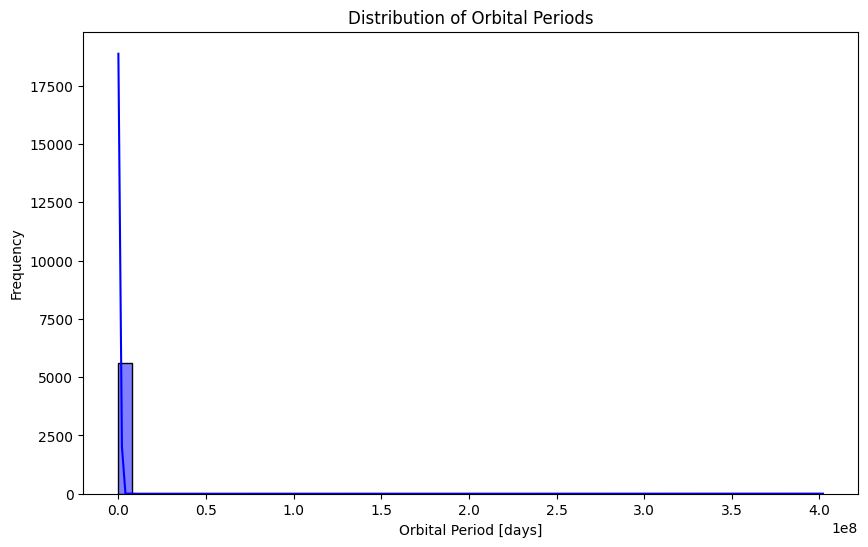

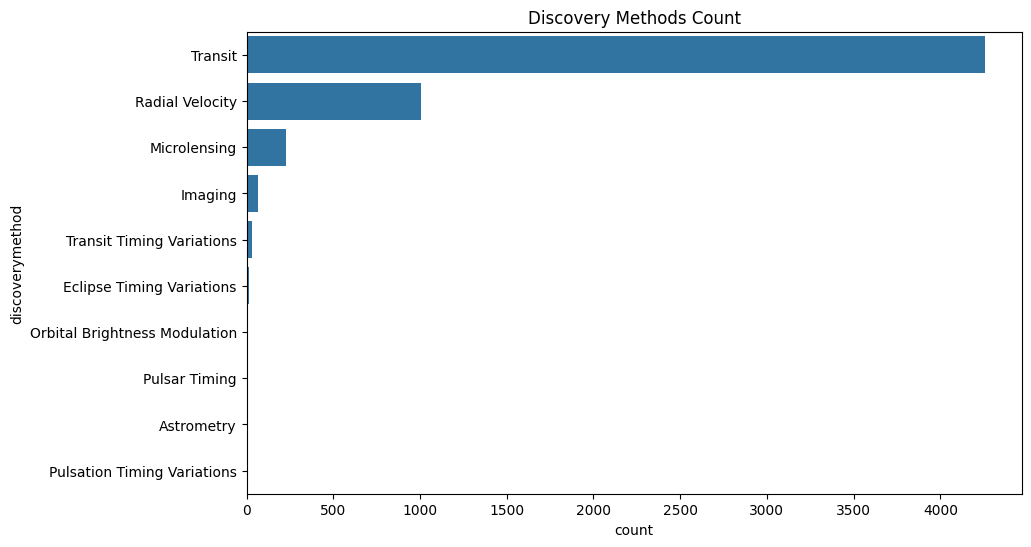

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['pl_orbper'], bins=50, kde=True, color='blue')
plt.title("Distribution of Orbital Periods")
plt.xlabel("Orbital Period [days]")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['discoverymethod'], order=data_cleaned['discoverymethod'].value_counts().index)
plt.title("Discovery Methods Count")
plt.show()


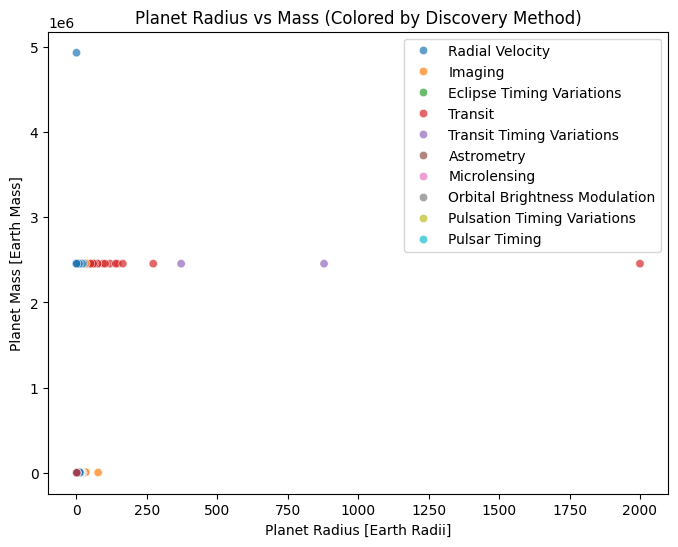

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, hue='discoverymethod', alpha=0.7)
plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
plt.xlabel("Planet Radius [Earth Radii]")
plt.ylabel("Planet Mass [Earth Mass]")
plt.legend(loc='best')
plt.show()


In [10]:
# # Pairplot for selected features
# selected_features = ['pl_rade', 'pl_bmasse', 'pl_orbsmax', 'pl_orbper']
# sns.pairplot(data_cleaned[selected_features])
# plt.show()

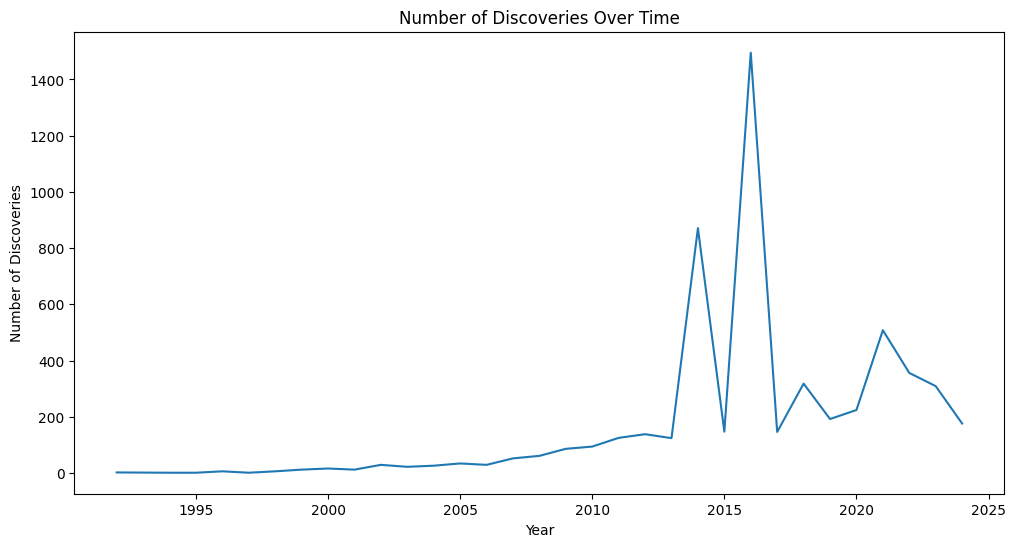

In [11]:
plt.figure(figsize=(12, 6))
discovery_trends = data_cleaned['disc_year'].value_counts().sort_index()
sns.lineplot(x=discovery_trends.index, y=discovery_trends.values)
plt.title("Number of Discoveries Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Discoveries")
plt.show()

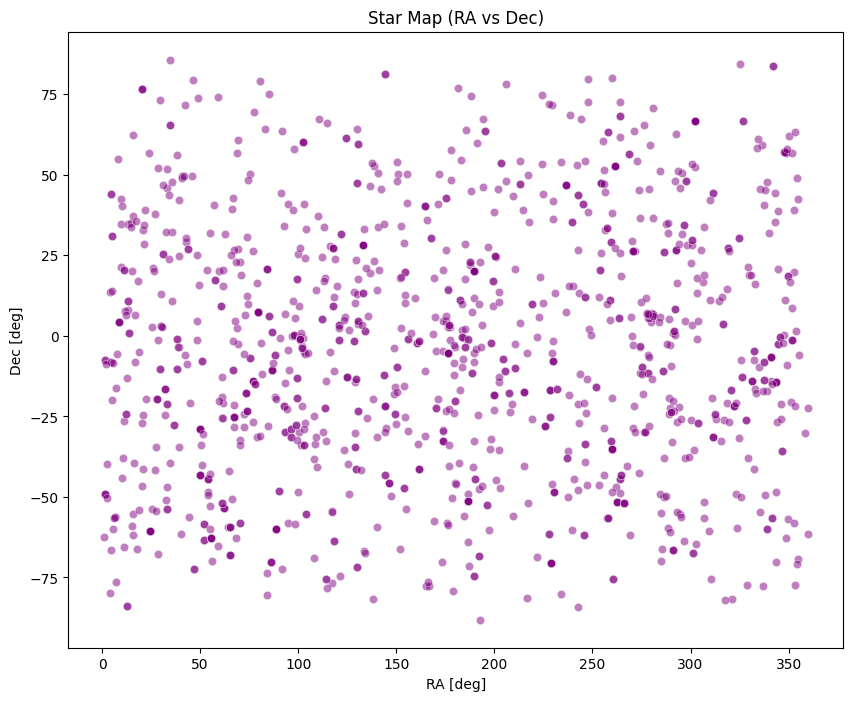

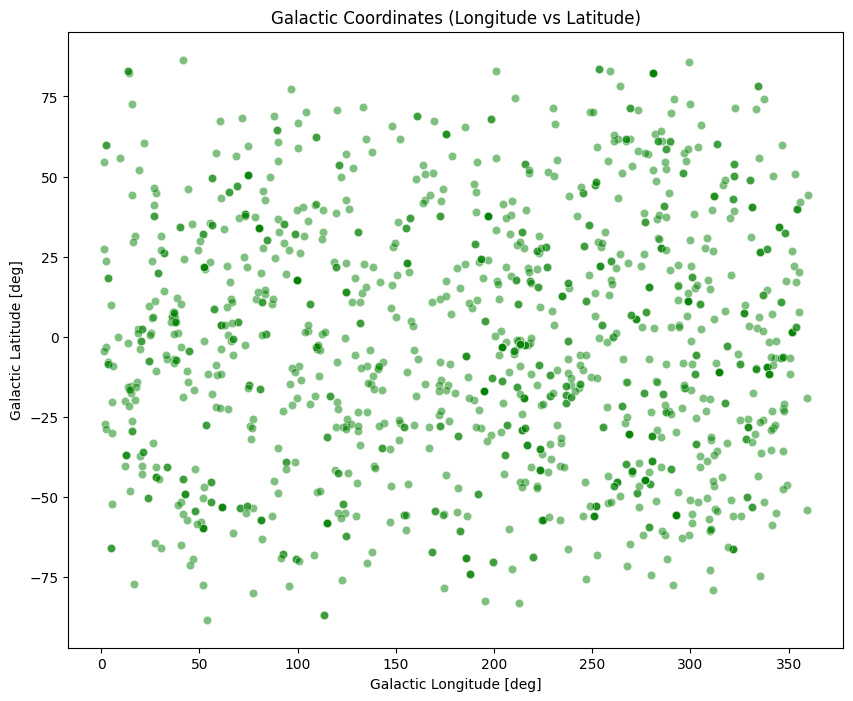

In [12]:
# Star Map: RA vs Dec
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_cleaned['ra'], y=data_cleaned['dec'], alpha=0.5, color='purple')
plt.title("Star Map (RA vs Dec)")
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.show()

# Galactic Coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_cleaned['glon'], y=data_cleaned['glat'], alpha=0.5, color='green')
plt.title("Galactic Coordinates (Longitude vs Latitude)")
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
plt.show()


In [13]:
# # Feature Importance with Random Forest
# from sklearn.ensemble import RandomForestRegressor

# # Prepare data
# target = 'pl_bmasse'  # Example target column
# features = data_cleaned.drop(columns=[target, 'pl_name', 'hostname'])  # Remove non-numerical IDs
# X = pd.get_dummies(features, drop_first=True)  # Encode categorical variables
# y = data_cleaned[target].dropna()  # Drop missing target values

# # Align features and target
# X = X.loc[y.index]

# # Train a Random Forest for feature importance
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)
# importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 6))
# importances[:20].plot(kind='bar', color='skyblue')
# plt.title("Top 20 Feature Importances")
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.show()


In [14]:
# Calculate distance from parallax (d = 1 / parallax in arcseconds)
data_cleaned['distance_pc'] = 1 / (data_cleaned['sy_plx'] / 1000)  # Convert mas to arcseconds

# Calculate velocity components in 3D space
# Proper motion converted to angular displacement (in AU/yr)
AU_PER_PC = 206265  # 1 parsec in AU
data_cleaned['motion_RA'] = data_cleaned['sy_pmra'] * data_cleaned['distance_pc'] * AU_PER_PC / 1000
data_cleaned['motion_Dec'] = data_cleaned['sy_pmdec'] * data_cleaned['distance_pc'] * AU_PER_PC / 1000
data_cleaned['motion_Radial'] = data_cleaned['st_radv']  # Use radial velocity as is

# Combine for 3D motion vector magnitude
data_cleaned['motion_magnitude'] = np.sqrt(
    data_cleaned['motion_RA']**2 + 
    data_cleaned['motion_Dec']**2 + 
    data_cleaned['motion_Radial']**2
)

print(data_cleaned[['motion_RA', 'motion_Dec', 'motion_Radial', 'motion_magnitude']].head())


      motion_RA    motion_Dec  motion_Radial  motion_magnitude
0 -2.103805e+06  1.698014e+06          43.37      2.703562e+06
1  8.894787e+04  2.622618e+05         -17.52      2.769350e+05
2  4.479457e+06 -1.305958e+06         -59.73      4.665947e+06
3  4.885667e+05 -1.097133e+06         -13.82      1.200999e+06
4 -5.881001e+05 -7.089653e+05         -28.10      9.211371e+05


C:\Users\techn\AppData\Local\Temp\ipykernel_8028\4093484154.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['distance_pc'] = 1 / (data_cleaned['sy_plx'] / 1000)  # Convert mas to arcseconds
C:\Users\techn\AppData\Local\Temp\ipykernel_8028\4093484154.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['motion_RA'] = data_cleaned['sy_pmra'] * data_cleaned['distance_pc'] * AU_PER_PC / 1000
C:\Users\techn\AppData\Local\Temp\ipykernel_8028\4093484154.py:8: PerformanceWarning: DataFrame is highly fragment

C:\Users\techn\AppData\Local\Temp\ipykernel_8028\889309577.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['future_RA'] = data_cleaned['ra'] + (data_cleaned['sy_pmra'] / 1000 * years) / 3600  # Convert mas/yr to degrees
C:\Users\techn\AppData\Local\Temp\ipykernel_8028\889309577.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['future_Dec'] = data_cleaned['dec'] + (data_cleaned['sy_pmdec'] / 1000 * years) / 3600


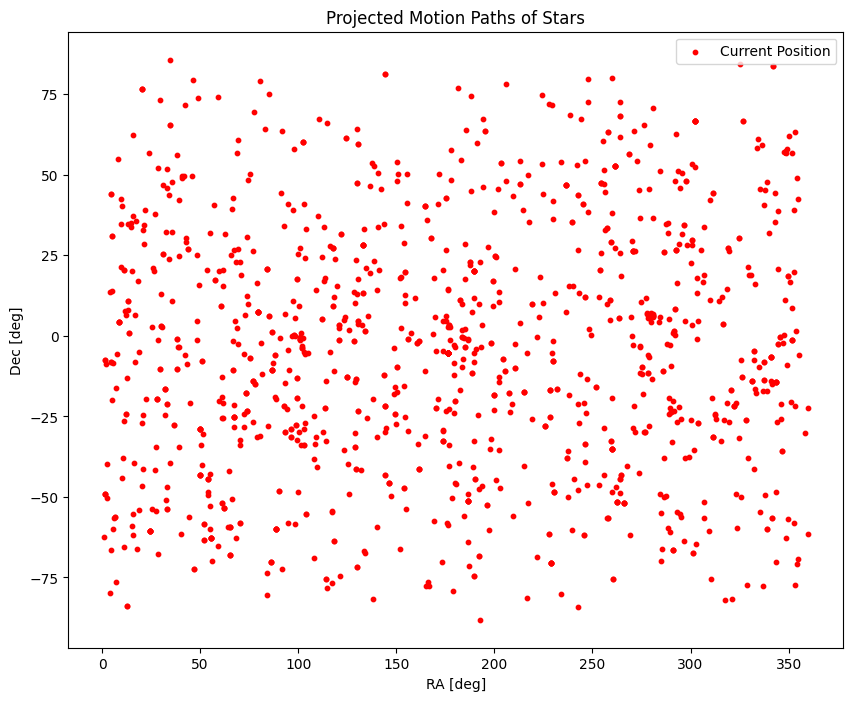

In [15]:
# Simulate motion over a time period (e.g., 100 years)
years = 100
data_cleaned['future_RA'] = data_cleaned['ra'] + (data_cleaned['sy_pmra'] / 1000 * years) / 3600  # Convert mas/yr to degrees
data_cleaned['future_Dec'] = data_cleaned['dec'] + (data_cleaned['sy_pmdec'] / 1000 * years) / 3600

# Plot current and future positions
plt.figure(figsize=(10, 8))
plt.quiver(data_cleaned['ra'], data_cleaned['dec'], 
           data_cleaned['future_RA'] - data_cleaned['ra'], 
           data_cleaned['future_Dec'] - data_cleaned['dec'], 
           angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)

plt.scatter(data_cleaned['ra'], data_cleaned['dec'], color='red', s=10, label='Current Position')
plt.title("Projected Motion Paths of Stars")
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.legend()
plt.show()


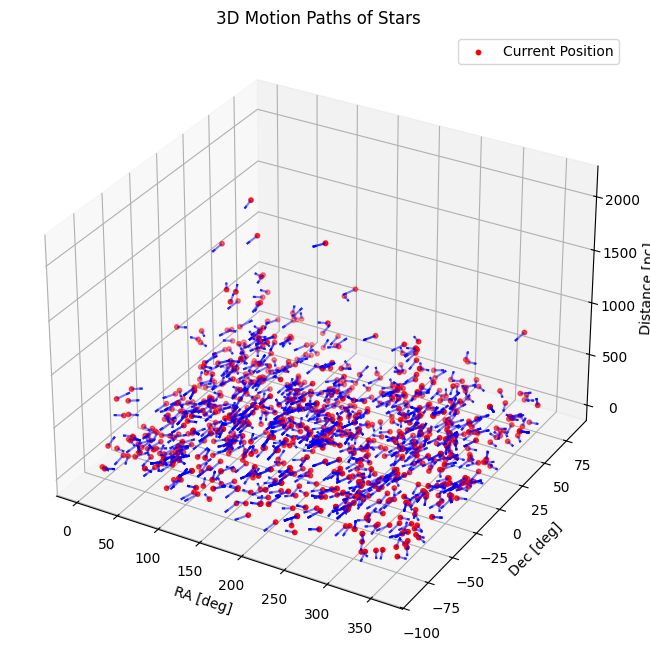

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D motion paths
ax.quiver(
    data_cleaned['ra'], data_cleaned['dec'], data_cleaned['distance_pc'], 
    data_cleaned['motion_RA'], data_cleaned['motion_Dec'], data_cleaned['motion_Radial'], 
    length=10, normalize=True, color='blue', alpha=0.5
)

# Plot current positions
ax.scatter(data_cleaned['ra'], data_cleaned['dec'], data_cleaned['distance_pc'], 
           color='red', label='Current Position', s=10)

ax.set_title("3D Motion Paths of Stars")
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")
ax.set_zlabel("Distance [pc]")
plt.legend()
plt.show()


In [17]:
import numpy as np

# Function to solve Kepler's equation for Eccentric Anomaly
def solve_kepler(M, e, tol=1e-6):
    E = M  # Initial guess
    while True:
        delta_E = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta_E
        if abs(delta_E) < tol:
            break
    return E

# Simulate orbital path for one planet
def simulate_orbit(a, e, i, omega, Omega, P, num_points=100):
    # Generate mean anomaly (M) over one period
    mean_anomaly = np.linspace(0, 2 * np.pi, num_points)
    i_rad = np.radians(i)
    omega_rad = np.radians(omega)
    Omega_rad = np.radians(Omega)
    
    # Solve Kepler's equation for Eccentric Anomaly (E)
    E = np.array([solve_kepler(M, e) for M in mean_anomaly])
    
    # True anomaly and radius
    true_anomaly = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
    r = a * (1 - e**2) / (1 + e * np.cos(true_anomaly))
    
    # Orbital position in orbital plane
    x_orb = r * np.cos(true_anomaly)
    y_orb = r * np.sin(true_anomaly)
    z_orb = np.zeros_like(x_orb)
    
    # Rotation matrices for inclination, argument of periastron, and longitude of ascending node
    R_i = np.array([[1, 0, 0],
                    [0, np.cos(i_rad), -np.sin(i_rad)],
                    [0, np.sin(i_rad), np.cos(i_rad)]])
    R_omega = np.array([[np.cos(omega_rad), -np.sin(omega_rad), 0],
                        [np.sin(omega_rad), np.cos(omega_rad), 0],
                        [0, 0, 1]])
    R_Omega = np.array([[np.cos(Omega_rad), -np.sin(Omega_rad), 0],
                        [np.sin(Omega_rad), np.cos(Omega_rad), 0],
                        [0, 0, 1]])
    
    # Full rotation
    rotation_matrix = R_Omega @ R_i @ R_omega
    
    # Apply rotation to transform orbital plane coordinates to 3D space
    orbital_coords = np.dot(rotation_matrix, np.vstack((x_orb, y_orb, z_orb)))
    return orbital_coords


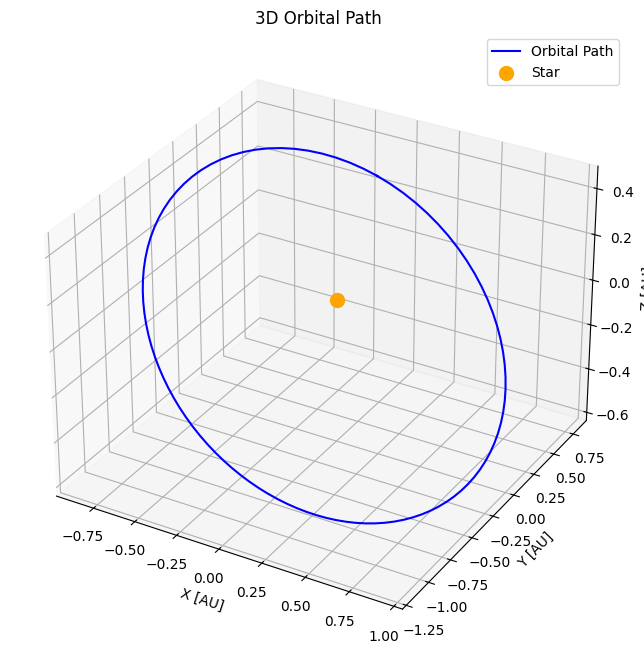

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example: Simulate for one planet
a = 1.0  # Semi-major axis in AU
e = 0.2  # Eccentricity
i = 30   # Inclination in degrees
omega = 45  # Argument of periastron in degrees
Omega = 60  # Longitude of ascending node in degrees
P = 365.25  # Orbital period in days

# Get orbital coordinates
orbit_coords = simulate_orbit(a, e, i, omega, Omega, P)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(orbit_coords[0], orbit_coords[1], orbit_coords[2], label='Orbital Path', color='blue')
ax.scatter([0], [0], [0], color='orange', label='Star', s=100)  # Star at the center
ax.set_title("3D Orbital Path")
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")
plt.legend()
plt.show()


In [19]:
# Ensure numerical columns are properly cast
data_cleaned['pl_orbsmax'] = pd.to_numeric(data_cleaned['pl_orbsmax'], errors='coerce')
data_cleaned['pl_orbeccen'] = pd.to_numeric(data_cleaned['pl_orbeccen'], errors='coerce')
data_cleaned['pl_orbincl'] = pd.to_numeric(data_cleaned['pl_orbincl'], errors='coerce')
data_cleaned['pl_orblper'] = pd.to_numeric(data_cleaned['pl_orblper'], errors='coerce')
data_cleaned['pl_orbper'] = pd.to_numeric(data_cleaned['pl_orbper'], errors='coerce')


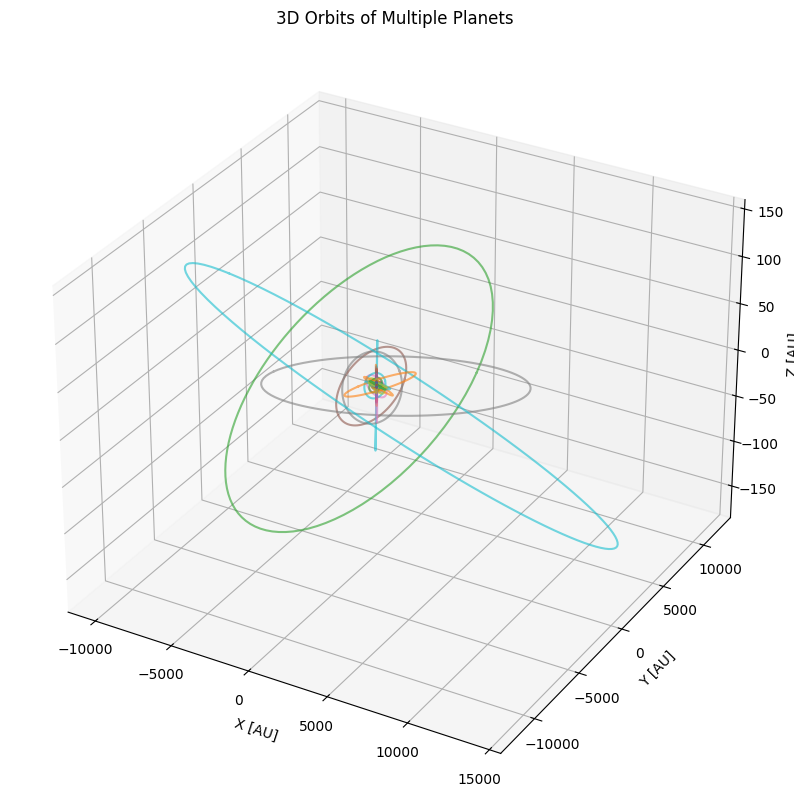

In [20]:
# Iterate through dataset for multiple planets
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

for _, planet in data_cleaned.iterrows():
    if not pd.isna(planet['pl_orbsmax']) and not pd.isna(planet['pl_orbeccen']):
        a = planet['pl_orbsmax']
        e = planet['pl_orbeccen']
        i = planet.get('pl_orbincl', 0)  # Default to 0 if missing
        omega = planet.get('pl_orblper', 0)  # Default to 0 if missing
        Omega = np.random.uniform(0, 360)  # Random if missing
        P = planet.get('pl_orbper', 365.25)  # Default period if missing
        coords = simulate_orbit(a, e, i, omega, Omega, P)
        ax.plot(coords[0], coords[1], coords[2], alpha=0.6)

ax.set_title("3D Orbits of Multiple Planets")
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")
plt.show()


In [21]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Number of frames for the animation
frames = 200

# Function to simulate orbital positions at specific time step
def simulate_orbit_step(a, e, i, omega, Omega, P, time):
    M = 2 * np.pi * (time % P) / P  # Mean anomaly
    i_rad = np.radians(i)
    omega_rad = np.radians(omega)
    Omega_rad = np.radians(Omega)

    # Solve Kepler's equation
    E = solve_kepler(M, e)
    true_anomaly = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
    r = a * (1 - e**2) / (1 + e * np.cos(true_anomaly))

    # Orbital position in orbital plane
    x_orb = r * np.cos(true_anomaly)
    y_orb = r * np.sin(true_anomaly)
    z_orb = 0  # Assume planar orbit initially

    # Rotation matrices for 3D transformation
    R_i = np.array([[1, 0, 0],
                    [0, np.cos(i_rad), -np.sin(i_rad)],
                    [0, np.sin(i_rad), np.cos(i_rad)]])
    R_omega = np.array([[np.cos(omega_rad), -np.sin(omega_rad), 0],
                        [np.sin(omega_rad), np.cos(omega_rad), 0],
                        [0, 0, 1]])
    R_Omega = np.array([[np.cos(Omega_rad), -np.sin(Omega_rad), 0],
                        [np.sin(Omega_rad), np.cos(Omega_rad), 0],
                        [0, 0, 1]])
    
    rotation_matrix = R_Omega @ R_i @ R_omega
    orbital_coords = np.dot(rotation_matrix, np.array([x_orb, y_orb, z_orb]))
    return orbital_coords


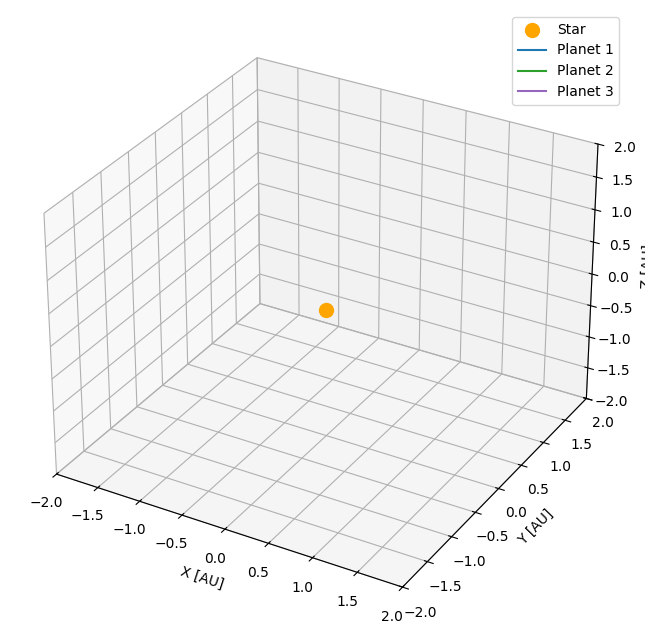

In [22]:
# Example data for a few planets
planetary_data = [
    {'a': 1.0, 'e': 0.2, 'i': 30, 'omega': 45, 'Omega': 60, 'P': 365.25},  # Planet 1
    {'a': 1.5, 'e': 0.1, 'i': 10, 'omega': 90, 'Omega': 120, 'P': 687},    # Planet 2
    {'a': 0.7, 'e': 0.3, 'i': 45, 'omega': 135, 'Omega': 180, 'P': 224.7}  # Planet 3
]

# Initialize figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot star at center
ax.scatter([0], [0], [0], color='orange', label='Star', s=100)

# Store lines for each planet
planet_lines = []
planet_points = []

for planet in planetary_data:
    line, = ax.plot([], [], [], label=f"Planet {planetary_data.index(planet)+1}")
    point, = ax.plot([], [], [], 'o')
    planet_lines.append(line)
    planet_points.append(point)

# Set axis limits
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")
ax.legend()

# Animation update function
def update(frame):
    for idx, planet in enumerate(planetary_data):
        # Calculate current position
        coords = simulate_orbit_step(
            a=planet['a'], e=planet['e'], i=planet['i'], 
            omega=planet['omega'], Omega=planet['Omega'], 
            P=planet['P'], time=frame
        )
        
        # Append to line for trajectory
        xdata, ydata, zdata = planet_lines[idx].get_data_3d()
        xdata = np.append(xdata, coords[0])
        ydata = np.append(ydata, coords[1])
        zdata = np.append(zdata, coords[2])
        planet_lines[idx].set_data_3d(xdata, ydata, zdata)
        
        # Update current position marker
        planet_points[idx].set_data_3d([coords[0]], [coords[1]], [coords[2]])
    return planet_lines + planet_points

# Create animation
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=False)
plt.show()


In [23]:
from matplotlib.animation import PillowWriter

# Save as GIF
writer = PillowWriter(fps=20)
ani.save("orbital_animation.gif", writer=writer)


In [24]:
import numpy as np

required_columns = ['pl_name', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_orblper', 'pl_orbper']
filtered_data = datas[required_columns]

# Handle missing values
filtered_data = filtered_data.dropna(subset=['pl_orbsmax', 'pl_orbeccen', 'pl_orbper'])  # Essential features
filtered_data['pl_orbincl'].fillna(0, inplace=True)  # Default inclination to 0 if missing
filtered_data['pl_orblper'].fillna(0, inplace=True)  # Default argument of periastron to 0 if missing

# Assign random values for Ω (Longitude of Ascending Node) if not provided
filtered_data['pl_Omega'] = np.random.uniform(0, 360, len(filtered_data))

# Create the planetary data list for animation
planetary_data = []
for _, row in filtered_data.iterrows():
    planetary_data.append({
        'name': row['pl_name'],   # Planet name
        'a': row['pl_orbsmax'],  # Semi-major axis
        'e': row['pl_orbeccen'], # Eccentricity
        'i': row['pl_orbincl'],  # Inclination
        'omega': row['pl_orblper'], # Argument of periastron
        'Omega': row['pl_Omega'],   # Longitude of ascending node
        'P': row['pl_orbper']    # Orbital period
    })

# Print planetary data
print(planetary_data[:5])  # Preview first 5 planets


[{'name': '11 Com b', 'a': '1.178', 'e': 0.238, 'i': 0, 'omega': 91.33, 'Omega': 358.4466760685072, 'P': 323.21}, {'name': '11 UMi b', 'a': '1.53', 'e': 0.08, 'i': 0, 'omega': 117.63, 'Omega': 17.23154618222654, 'P': 516.21997}, {'name': '14 And b', 'a': '0.775', 'e': 0.0, 'i': 0, 'omega': 0.0, 'Omega': 229.71692372308127, 'P': 186.76}, {'name': '14 Her b', 'a': '2.774', 'e': 0.373, 'i': '144.652', 'omega': 23.043, 'Omega': 306.187076489639, 'P': 1765.0389}, {'name': '16 Cyg B b', 'a': '1.66', 'e': 0.68, 'i': 0, 'omega': 82.74, 'Omega': 268.86294449426964, 'P': 798.5}]


C:\Users\techn\AppData\Local\Temp\ipykernel_8028\3634498229.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['pl_orbincl'].fillna(0, inplace=True)  # Default inclination to 0 if missing
C:\Users\techn\AppData\Local\Temp\ipykernel_8028\3634498229.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

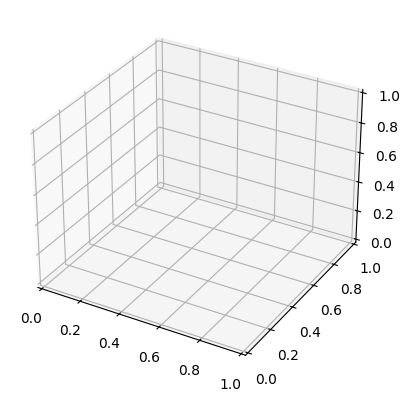

In [25]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Setup figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Update function for animation
def update(frame):
    for planet in planetary_data:
        coords = simulate_orbit_step(
            a=planet['a'], 
            e=planet['e'], 
            i=planet['i'], 
            omega=planet['omega'], 
            Omega=planet['Omega'], 
            P=planet['P'], 
            time=frame  # This frame is the time step
        )
        # Add the coordinates to the plot
        ax.scatter(coords[0], coords[1], coords[2])
    return ax

# Run animation
ani = FuncAnimation(fig, update, frames=range(0, 365), interval=50)
plt.show()


In [26]:
import re
def clean_html_and_convert_to_nan(text):

    clean = re.compile("<.*?>")
    cleaned_text = re.sub(clean, "", str(text))

    try:
        return float(cleaned_text)
    except ValueError:
        return np.nan 

for col in non_numeric_cols:
    data_cleaned[col] = data_cleaned[col].apply(clean_html_and_convert_to_nan)

# corr_matrix = data_cleaned.corr()

# # plt.figure(figsize=(16, 10))
# # sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
# # plt.title("Correlation Heatmap")
# # plt.show()
# corr_matrix

In [27]:
# %run "F:\MTech_IIITD\Semester 1\Machine Learning\Projects\Astronomical Svent Simulator\PythonFiles\EDA_Projection\GalaxyPredict.py"